# 1 Importing all necessory libraries

In [2]:
!pip install plotly

In [3]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

In [4]:
#Initializing Plotly
import plotly.io as pio
pio.renderers.default = 'colab'

# 2 Importind datasets from Yahoo finance

In [6]:
df = pd.read_csv("^SET.BK.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-04-27,1564.060059,1570.579956,1553.030029,1559.229980,1559.229980,19043900
1,2021-04-28,1565.699951,1578.619995,1562.839966,1576.790039,1576.790039,13603100
2,2021-04-29,1584.550049,1592.900024,1583.979980,1590.459961,1590.459961,12642900
3,2021-04-30,1591.119995,1593.229980,1580.739990,1583.130005,1583.130005,14643800
4,2021-05-05,1581.859985,1583.270020,1547.349976,1549.219971,1549.219971,13820400


In [ ]:
df.info

<bound method DataFrame.info of            Date         Open         High          Low        Close  \
0    2021-04-27  1564.060059  1570.579956  1553.030029  1559.229980   
1    2021-04-28  1565.699951  1578.619995  1562.839966  1576.790039   
2    2021-04-29  1584.550049  1592.900024  1583.979980  1590.459961   
3    2021-04-30  1591.119995  1593.229980  1580.739990  1583.130005   
4    2021-05-05  1581.859985  1583.270020  1547.349976  1549.219971   
..          ...          ...          ...          ...          ...   
238  2022-04-21  1686.310059  1693.969971  1682.650024  1690.550049   
239  2022-04-22  1686.260010  1690.589966  1680.859985  1690.589966   
240  2022-04-25  1677.550049  1683.060059  1672.989990  1675.329956   
241  2022-04-26  1681.739990  1685.420044  1668.760010  1668.969971   
242  2022-04-27  1667.449951  1670.219971  1655.250000  1661.890015   

       Adj Close    Volume  
0    1559.229980  19043900  
1    1576.790039  13603100  
2    1590.459961  12642900  

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,243.000000,243.000000,243.000000,243.000000,243.000000,2.430000e+02
mean,1625.640951,1631.863742,1617.191028,1624.328353,1624.328353,1.006922e+07
std,46.720552,46.065703,48.178558,46.865186,46.865186,3.268902e+06
min,1523.420044,1525.729980,1501.020020,1521.719971,1521.719971,0.000000e+00
25%,1591.205017,1596.260010,1580.770019,1590.074951,1590.074951,7.704950e+06
50%,1632.180054,1636.219971,1623.000000,1630.469971,1630.469971,9.852700e+06
75%,1659.005005,1663.994995,1653.205017,1657.815002,1657.815002,1.188500e+07
max,1712.949951,1718.550049,1708.430054,1713.199951,1713.199951,2.302490e+07


# 3 Data Visualization using Poltly Express

In [ ]:
# Visualizing historical performance of data
#Line graph, Area graph , box plot (Analyzing price and volume)
px.area(df , x ='Date' , y = 'Close')

In [ ]:
px.line(df, x = 'Date', y ='Close')

In [ ]:
px.area(df, x = 'Date', y ='Volume')

In [ ]:
px.bar(df,y = 'Volume')

In [ ]:
px.box(df, y ='Volume')

# 4 Data Preparation and modelling

### 4.1 Data Preparation

In [7]:
columns = ['Date','Close']
ndf = pd.DataFrame(df,columns = columns)

In [ ]:
ndf

,Date,Close
0,2021-04-26,1559.530029
1,2021-04-27,1559.229980
2,2021-04-28,1576.790039
3,2021-04-29,1590.459961
4,2021-04-30,1583.130005
...,...,...
237,2022-04-19,1675.619995
238,2022-04-20,1680.349976
239,2022-04-21,1690.550049
240,2022-04-22,1690.589966


In [8]:
prophet_df = ndf.rename(columns ={'Date':'ds','Close':'y'})

In [ ]:
prophet_df

,ds,y
0,2021-04-27,1559.229980
1,2021-04-28,1576.790039
2,2021-04-29,1590.459961
3,2021-04-30,1583.130005
4,2021-05-05,1549.219971
...,...,...
238,2022-04-21,1690.550049
239,2022-04-22,1690.589966
240,2022-04-25,1675.329956
241,2022-04-26,1668.969971


### 4.2  Craeating Prophet Model

In [9]:
# prophet model crate
model = Prophet()
model.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# 5 Forecasting

In [12]:
future = model.make_future_dataframe(periods=30)

In [13]:
forecast = model.predict(future)

In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-04-27,1558.419414,1536.406947,1582.340766,1558.419414,1558.419414,-0.005259,-0.005259,-0.005259,-0.005259,-0.005259,-0.005259,0.0,0.0,0.0,1558.414156
1,2021-04-28,1559.435158,1539.769059,1584.726398,1559.435158,1559.435158,1.771802,1.771802,1.771802,1.771802,1.771802,1.771802,0.0,0.0,0.0,1561.206960
2,2021-04-29,1560.450902,1540.127441,1584.910267,1560.450902,1560.450902,2.720152,2.720152,2.720152,2.720152,2.720152,2.720152,0.0,0.0,0.0,1563.171054
3,2021-04-30,1561.466646,1540.701573,1584.671063,1561.466646,1561.466646,0.862798,0.862798,0.862798,0.862798,0.862798,0.862798,0.0,0.0,0.0,1562.329444
4,2021-05-05,1566.545366,1545.388329,1591.925912,1566.545366,1566.545366,1.771802,1.771802,1.771802,1.771802,1.771802,1.771802,0.0,0.0,0.0,1568.317168


In [ ]:
#Visualize
px.line(forecast,x = 'ds', y = 'yhat')

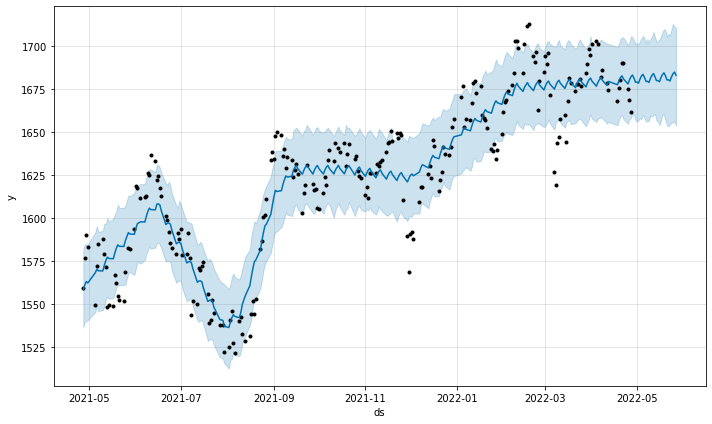

In [ ]:
figure = model.plot(forecast,xlabel='ds', ylabel='y')

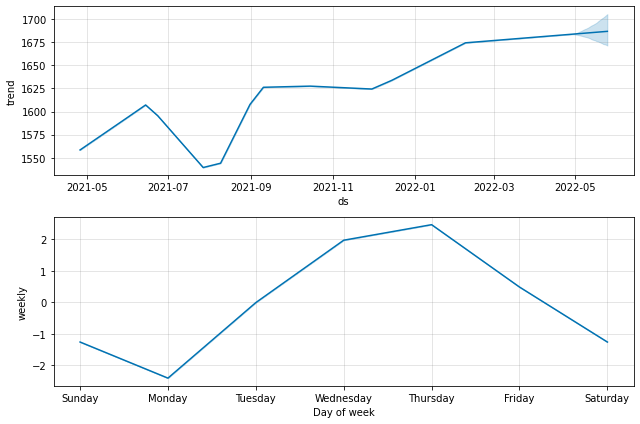

In [ ]:
figure2 = model.plot_components(forecast)

### 5.1 Downloading forecast data

In [ ]:
from google.colab import files
forecast.to_csv('forecast_stock.csv')
files.download('forecast_stock.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
forecast.tail(30)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
243,2022-04-28,1680.576182,1660.892443,1705.229787,1680.576182,1680.576182,2.720152,2.720152,2.720152,2.720152,2.720152,2.720152,0.0,0.0,0.0,1683.296334
244,2022-04-29,1680.638176,1659.929871,1703.591237,1680.638176,1680.638176,0.862798,0.862798,0.862798,0.862798,0.862798,0.862798,0.0,0.0,0.0,1681.500974
245,2022-04-30,1680.700171,1656.973559,1701.237893,1680.700171,1680.702169,-1.534981,-1.534981,-1.534981,-1.534981,-1.534981,-1.534981,0.0,0.0,0.0,1679.165189
246,2022-05-01,1680.762165,1656.164526,1701.931422,1680.681739,1680.859643,-1.534982,-1.534982,-1.534982,-1.534982,-1.534982,-1.534982,0.0,0.0,0.0,1679.227183
247,2022-05-02,1680.824160,1656.927911,1701.213559,1680.577466,1681.063356,-2.279531,-2.279531,-2.279531,-2.279531,-2.279531,-2.279531,0.0,0.0,0.0,1678.544630
248,2022-05-03,1680.886155,1658.282528,1703.083306,1680.281481,1681.380207,-0.005259,-0.005259,-0.005259,-0.005259,-0.005259,-0.005259,0.0,0.0,0.0,1680.880896
249,2022-05-04,1680.948149,1657.630829,1704.528139,1679.983038,1681.662512,1.771802,1.771802,1.771802,1.771802,1.771802,1.771802,0.0,0.0,0.0,1682.719951
250,2022-05-05,1681.010144,1660.080440,1706.040840,1679.636373,1682.076764,2.720152,2.720152,2.720152,2.720152,2.720152,2.720152,0.0,0.0,0.0,1683.730296
251,2022-05-06,1681.072138,1658.339725,1704.667473,1679.366399,1682.435914,0.862798,0.862798,0.862798,0.862798,0.862798,0.862798,0.0,0.0,0.0,1681.934936
252,2022-05-07,1681.134133,1656.295818,1701.728641,1678.838738,1682.907392,-1.534981,-1.534981,-1.534981,-1.534981,-1.534981,-1.534981,0.0,0.0,0.0,1679.599152


### 5.2 Preparing forecast data

In [14]:
f_df = forecast[['ds','yhat']]
f_df

,ds,yhat
0,2021-04-27,1558.414156
1,2021-04-28,1561.206960
2,2021-04-29,1563.171054
3,2021-04-30,1562.329444
4,2021-05-05,1568.317168
...,...,...
268,2022-05-23,1679.846516
269,2022-05-24,1682.182783
270,2022-05-25,1684.021838
271,2022-05-26,1685.032183


In [15]:
d_df = df[['Date','Close']]
d_df

,Date,Close
0,2021-04-27,1559.229980
1,2021-04-28,1576.790039
2,2021-04-29,1590.459961
3,2021-04-30,1583.130005
4,2021-05-05,1549.219971
...,...,...
238,2022-04-21,1690.550049
239,2022-04-22,1690.589966
240,2022-04-25,1675.329956
241,2022-04-26,1668.969971


In [16]:
result = pd.concat([f_df, d_df], axis=1, join='outer')
result

,ds,yhat,Date,Close
0,2021-04-27,1558.414156,2021-04-27,1559.229980
1,2021-04-28,1561.206960,2021-04-28,1576.790039
2,2021-04-29,1563.171054,2021-04-29,1590.459961
3,2021-04-30,1562.329444,2021-04-30,1583.130005
4,2021-05-05,1568.317168,2021-05-05,1549.219971
...,...,...,...,...
268,2022-05-23,1679.846516,NaN,NaN
269,2022-05-24,1682.182783,NaN,NaN
270,2022-05-25,1684.021838,NaN,NaN
271,2022-05-26,1685.032183,NaN,NaN


# 6 Visualizing predicting data

In [18]:
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

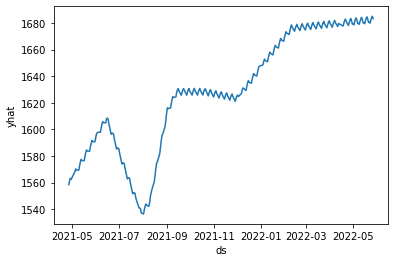

In [ ]:
sns.lineplot(data=result, x="ds", y="yhat")

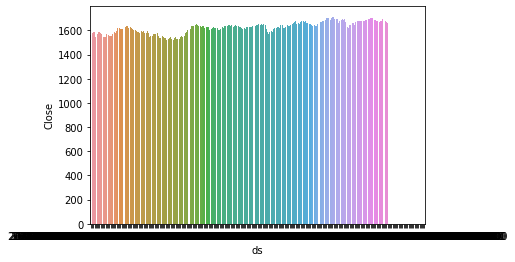

In [ ]:
sns.barplot(data=result, x="ds", y="Close")

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


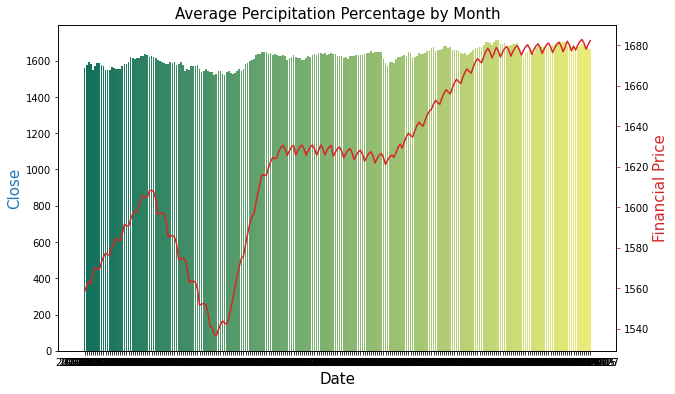

In [19]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:blue'
ax1.set_title('Average Percipitation Percentage by Month', fontsize=15)
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Avg Temp', fontsize=15, color=color)
 #First graph bar graph
ax1 = sns.barplot(x='Date', y='Close', data = result, palette='summer')
ax1.tick_params(axis='y')
 #twinxShare x-axis 
ax2 = ax1.twinx()
color = 'tab:red'
 #Second figure, line chart
ax2.set_ylabel('Financial Price', fontsize=15, color=color)
ax2 = sns.lineplot(x='Date', y='yhat', data = result, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
 #Display drawing results
plt.show()

In [48]:
only_forecast_stock = result[['ds','yhat']].tail(30)
only_forecast_stock

,ds,yhat
243,2022-04-28,1683.296334
244,2022-04-29,1681.500974
245,2022-04-30,1679.165189
246,2022-05-01,1679.227183
247,2022-05-02,1678.544630
248,2022-05-03,1680.880896
249,2022-05-04,1682.719951
250,2022-05-05,1683.730296
251,2022-05-06,1681.934936
252,2022-05-07,1679.599152


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0, 0, '28-042022'),
 Text(0, 0, '29-042022'),
 Text(0, 0, '30-042022'),
 Text(0, 0, '01-052022'),
 Text(0, 0, '02-052022'),
 Text(0, 0, '03-052022'),
 Text(0, 0, '04-052022'),
 Text(0, 0, '05-052022'),
 Text(0, 0, '06-052022'),
 Text(0, 0, '07-052022'),
 Text(0, 0, '08-052022'),
 Text(0, 0, '09-052022'),
 Text(0, 0, '10-052022'),
 Text(0, 0, '11-052022'),
 Text(0, 0, '12-052022'),
 Text(0, 0, '13-052022'),
 Text(0, 0, '14-052022'),
 Text(0, 0, '15-052022'),
 Text(0, 0, '16-052022'),
 Text(0, 0, '17-052022'),
 Text(0, 0, '18-052022'),
 Text(0, 0, '19-052022'),
 Text(0, 0, '20-052022'),
 Text(0, 0, '21-052022'),
 Text(0, 0, '22-052022'),
 Text(0, 0, '23-052022'),
 Text(0, 0, '24-052022'),
 Text(0, 0, '25-052022'),
 Text(0, 0, '26-052022'),
 Text(0, 0, '27-052022')]

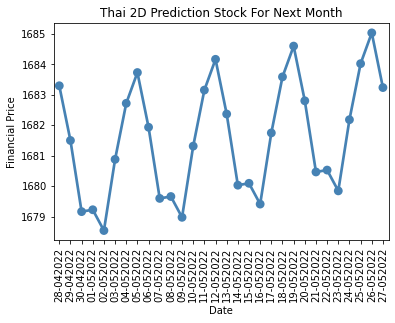

In [54]:
ax = sns.pointplot(only_forecast_stock['ds'],only_forecast_stock['yhat'],color ='steelblue')
ax.set(xlabel='Date',
       ylabel='Financial Price',
       title='Thai 2D Prediction Stock For Next Month')
ax.set_xticklabels(only_forecast_stock['ds'].dt.strftime('%d-%m%Y'),rotation = 90)

In [ ]:
  # Thanks